# Presidential Debate Twitter Sentiment Analysis using TextBlob

In [150]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [151]:
#Consumer Twitter developer account details[Keys have been modified for confidential purpose]
consumer_key='5bl7Z7mWfhOiTJAXXXXXXXXXX'
consumer_secret='9sFe3tVfudQDzTSaJSuiTlUe6azyKXNMZKTVlEH7XXXXXXXXXX'
access_token='1336316945658855427-xqTVVj09Va0Nck7uqmXMXXXXXXXXXX'
access_token_secret='Y57n1qyxDpiZtgAMzVUKinl3wHc6zNz2ormXXXXXXXXXX'

# Authentication

In [152]:
auth=tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tw.API(auth)

# Get Tweets

In [154]:
#Scraping tweets with the hashtag of #PresindtialDebate2020
hashtag=' #PresidentialDebate2020'
query=tw.Cursor(api.search, q=hashtag).items(100)
tweets=[{'Tweets':tweet.text,'Timestamp':tweet.created_at } for tweet in query]
print(tweets)

[{'Tweets': 'RT @GiannoCaldwell: Black and Latino men are listening. @JoeBiden’s policies have devastated communities of color. @realDonaldTrump made st…', 'Timestamp': datetime.datetime(2020, 12, 9, 5, 54, 50)}, {'Tweets': '#herdmentality #iVoted\xa0 #imspeaking #ImStillWithHer #JoeBiden #JoeWillLeadUs #KamalaHarris #Kenosha #LincolnProject… https://t.co/6xqRhIRptz', 'Timestamp': datetime.datetime(2020, 12, 9, 5, 52, 17)}, {'Tweets': 'RT @WMulina: I may be a bit overly excited for this debate!  🤓 #PresidentialDebate #PresidentialDebate2020 #Debates2020 #Debatenight @realD…', 'Timestamp': datetime.datetime(2020, 12, 9, 5, 24, 11)}, {'Tweets': "RT @sillymickel: Biden's cool!\n\nLove his style!\n\n#WilkesBarrePennsylvania #ScrantonPensylvania \n\n#FBR #resist #TrumpMassMurderer #Biden2020…", 'Timestamp': datetime.datetime(2020, 12, 9, 3, 35, 16)}, {'Tweets': "RT @chadfelixg: I'm happy with @realDonaldTrump's performance as President.\n\nIn researching my book, I delved into more than 160

In [155]:
df=pd.DataFrame.from_dict(tweets)

In [157]:
df['Tweets'][1]

'#herdmentality #iVoted\xa0 #imspeaking #ImStillWithHer #JoeBiden #JoeWillLeadUs #KamalaHarris #Kenosha #LincolnProject… https://t.co/6xqRhIRptz'

In [158]:
#Candidate names references to extract details of favourabe candidates
trump_refs=['Donaldtrump','Donald trump', 'Donald', 'Trump', 'Trump\s']
biden_refs=['JoeBiden','Joe Biden', 'Joe', 'Biden', 'Biden\s']

In [159]:
#Function to raise flag as 1 when a candidate name is mentioned in particular tweet
def identify(tweet, refs):
    flag=0
    for ref in refs:
        if tweet.find(ref)!=-1:
            flag=1
    return flag

df['Trump']=df['Tweets'].apply(lambda x: identify(x, trump_refs))
df['Biden']=df['Tweets'].apply(lambda x: identify(x, biden_refs))

# Preprocess

In [197]:
import nltk
from textblob import Word, TextBlob
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from nltk.corpus import stopwords
from tensorflow.keras.layers import Embedding

In [162]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Mohammed
[nltk_data]     Shreef\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Shreef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
custom_stopwords=['RT', '#2020 US Election']

In [164]:
stop_words=stopwords.words('english')

In [166]:
#Function for removing punctuations,stopwords and doing lemmatization on every word of text
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet=tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet=' '.join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet=' '.join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet=' '.join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)
df['Processed Tweet']=df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Trump,Biden,Processed Tweet
0,RT @GiannoCaldwell: Black and Latino men are l...,2020-12-09 05:54:50,1,1,@GiannoCaldwell: Black Latino men listening. @...
1,#herdmentality #iVoted #imspeaking #ImStillWi...,2020-12-09 05:52:17,0,1,#herdmentality #iVoted #imspeaking #ImStillWit...
2,RT @WMulina: I may be a bit overly excited for...,2020-12-09 05:24:11,0,0,@WMulina: I may bit overly excited debate! 🤓 #...
3,RT @sillymickel: Biden's cool!\n\nLove his sty...,2020-12-09 03:35:16,1,1,@sillymickel: Biden's cool! Love style! #Wilke...
4,RT @chadfelixg: I'm happy with @realDonaldTrum...,2020-12-08 06:17:30,1,0,@chadfelixg: I'm happy @realDonaldTrump's perf...


# calculate Sentiment

In [170]:
df['polarity']=df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity']=df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [83]:
df.head()

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity
0,RT @GiannoCaldwell: Black and Latino men are l...,2020-12-09 05:54:50,1,1,RT @GiannoCaldwell: Black Latino men listening...,-0.166667,0.433333
1,#herdmentality #iVoted #imspeaking #ImStillWi...,2020-12-09 05:52:17,0,0,#herdmentality #iVoted #imspeaking #ImStillWit...,0.000000,0.000000
2,RT @WMulina: I may be a bit overly excited for...,2020-12-09 05:24:11,0,0,RT @WMulina: I may bit overly excited debate! ...,0.468750,0.750000
3,RT @sillymickel: Biden's cool!\n\nLove his sty...,2020-12-09 03:35:16,1,1,RT @sillymickel: Biden's cool! Love style! #Wi...,0.531250,0.625000
4,RT @chadfelixg: I'm happy with @realDonaldTrum...,2020-12-08 06:17:30,1,1,RT @chadfelixg: I'm happy @realDonaldTrump's p...,0.800000,1.000000


Statistics of each candidate

In [171]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median]))

polarity                          subjectivity                    
           mean amax      amin    median         mean amax amin    median
Trump                                                                    
1      0.252722  1.0 -0.166667  0.136364     0.372922  1.0  0.0  0.454545

polarity                           subjectivity                   
          mean     amax      amin median         mean   amax amin median
Biden                                                                   
1      0.06363  0.53125 -0.166667    0.0     0.166745  0.625  0.0    0.0

# Visualise

In [190]:
biden=df[df['Biden']==1][['Timestamp','polarity']]
biden=biden.sort_values(by='Timestamp', ascending=True)
biden['MA polarity']=biden.polarity.rolling(10, min_periods=3).mean()

trump=df[df['Trump']==1][['Timestamp','polarity']]
trump=trump.sort_values(by='Timestamp', ascending=True)
trump['MA polarity']=trump.polarity.rolling(10, min_periods=3).mean()

In [198]:
trump.head()

,Timestamp,polarity,MA polarity
90,2020-11-30 17:01:07,0.000000,NaN
53,2020-12-01 19:47:47,0.312500,NaN
52,2020-12-01 23:46:28,0.800000,0.370833
51,2020-12-02 05:15:33,0.136364,0.312216
50,2020-12-02 05:16:41,0.136364,0.277045


Text(0.5, 0.98, 'Presidential Debate Analysis')

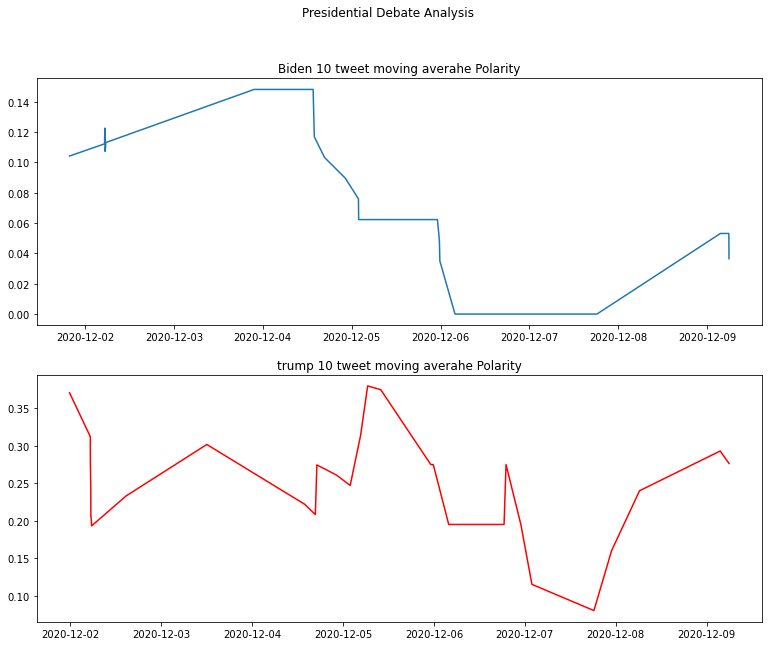

In [196]:
fig, axes =plt.subplots(2,1, figsize=(13,10))
axes[0].plot(biden['Timestamp'], biden['MA polarity'])
axes[0].set_title('\n'.join(['Biden 10 tweet moving averahe Polarity']))

axes[1].plot(trump['Timestamp'], trump['MA polarity'], color='red')
axes[1].set_title('\n'.join(['trump 10 tweet moving averahe Polarity']))
fig.suptitle('Presidential Debate Analysis')

Considering above tweets between specific timestamp, Trump has got higher mean positive polarity(0.34) compared to that of Biden's(0.15).